In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C:\Users\Ксения\AppData\Local\Temp\ipykernel_25060\1920082197.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().abs()


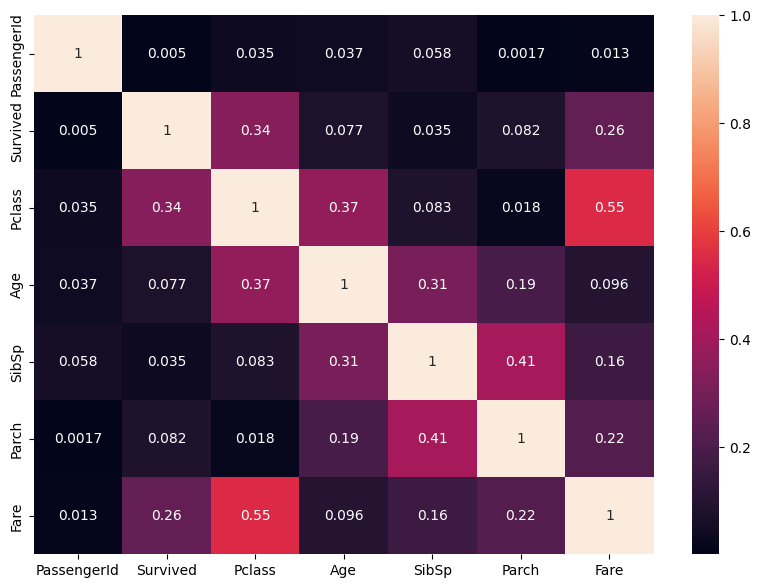

In [6]:
plt.figure(figsize=(10,7))
corr = df.corr().abs()
ax = sns.heatmap(corr, annot=True)

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### How many passengers ssurvived ?

In [8]:
count_survived = df["Survived"].sum()
print(f"Count of survived: {count_survived}")

Count of survived: 342


#### How many male, female and child passengers were aboard the Titanic?

In [9]:
df['Person'] = df.Sex
df.loc[df['Age'] < 18, 'Person'] = 'Child'
print(f"Person categories : {df.Person.unique()}")
print(f"Distribution of person : {df.Person.value_counts()}")

Person categories : ['male' 'female' 'Child']
Distribution of person : male      519
female    259
Child     113
Name: Person, dtype: int64


<Axes: >

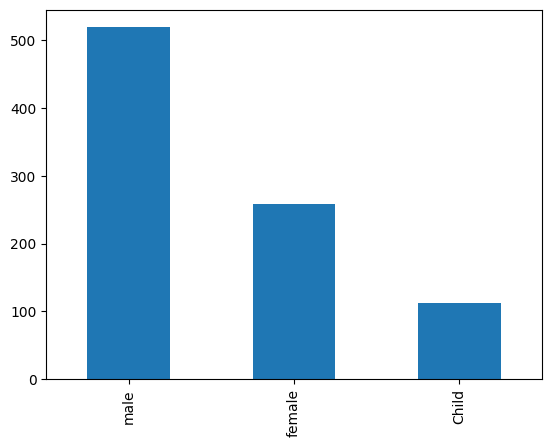

In [14]:
df.Person.value_counts().plot.bar()

#### How many nulls in the dataframe ?

In [16]:
missing_values = df.isnull().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Person           0
dtype: int64

#### Mean values of Fare grouped by Embarked

In [17]:
fare_embarked = df.groupby('Embarked')['Fare'].mean()
print(f'Mean ticket price:\n{fare_embarked}\n')

Mean ticket price:
Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64



<Axes: xlabel='Embarked'>

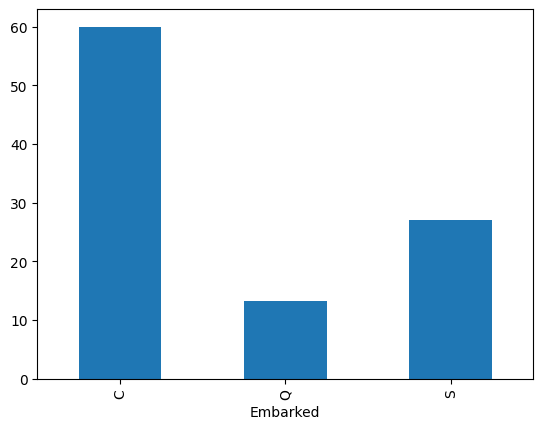

In [26]:
fare_embarked.plot.bar()

In [24]:
sur_embarked = df.groupby('Embarked')['Survived'].value_counts()
print(f'Mean ticket price:\n{sur_embarked}\n')

Mean ticket price:
Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64



<Axes: xlabel='Embarked,Survived'>

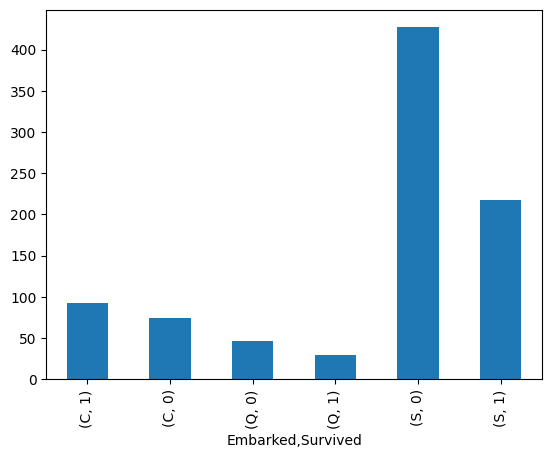

In [28]:
sur_embarked.plot.bar() #процентное соотношение

#### Unique values of AgeGroup and mean survived value by AgeGroup

In [30]:
bins = [0, 18, 30, 60, 100]
labels = ['Child', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

survival_rate = df.groupby('AgeGroup')['Survived'].mean()

print(f'Mean survived value by age groupes:\n{survival_rate}\n')

Mean survived value by age groupes:
AgeGroup
Child          0.503597
Young Adult    0.355556
Adult          0.420495
Senior         0.227273
Name: Survived, dtype: float64



<Axes: xlabel='AgeGroup'>

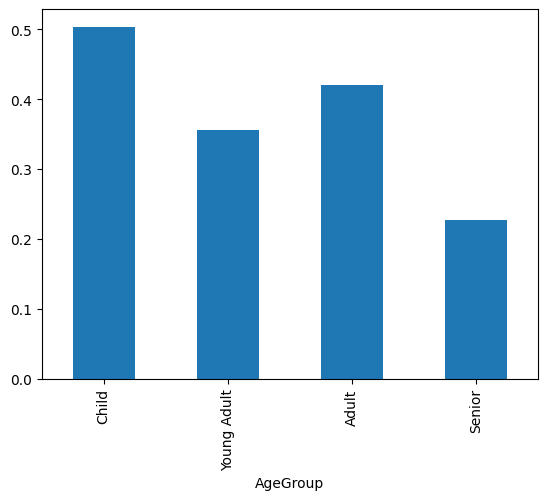

In [31]:
survival_rate.plot.bar()

#### Survival percent grouped by Age

In [33]:
survival_rate_age = df.groupby(['Survived'])['Age'].mean()
print(f'Survival percent grouped by Age:\n{survival_rate_age}\n')

Survival percent grouped by Age:
Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64



<Axes: xlabel='Survived'>

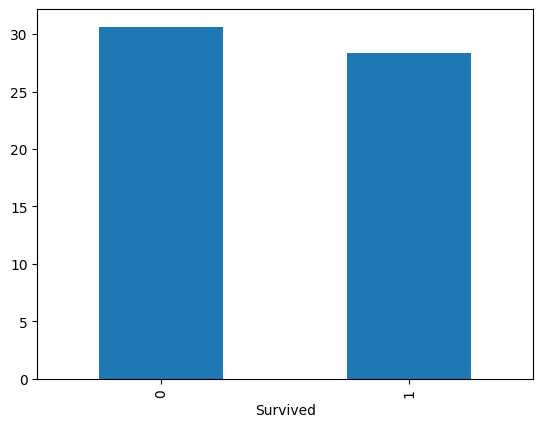

In [36]:
survival_rate_age.plot.bar()

#### Survival percent grouped by Pclass 

In [47]:
survival_rate_pclass_sex = df.groupby(['Pclass'])['Survived'].mean()
print(f'Survival percent grouped by Pclass and Sex:\n{survival_rate_pclass_sex}\n')

Survival percent grouped by Pclass and Sex:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64



<Axes: xlabel='Pclass'>

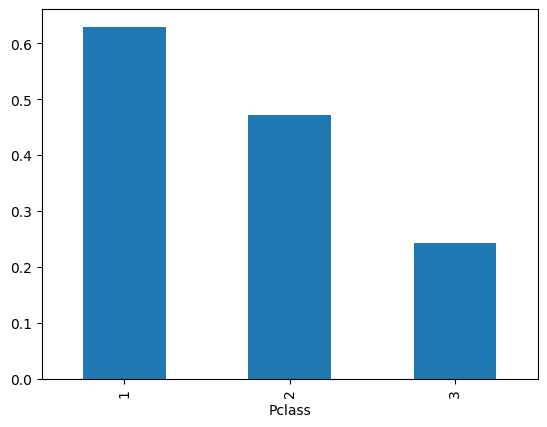

In [48]:
survival_rate_pclass_sex.plot.bar()

#### Survival percent grouped by Sex

In [18]:
survived_by_sex = df.groupby(['Sex'])['Survived'].mean()
print(f'Survival percent grouped by Sex:\n{survived_by_sex}\n')

Survival percent grouped by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64



#### Survival percent grouped by Survived

In [50]:
df['Fare'] = df['Fare'].round(0)
survived_by_fare= df.groupby(['Survived'])['Fare'].mean()
print(f'Survival percent grouped by Survived:\n{survived_by_fare.sort_values(ascending=False)}\n')

Survival percent grouped by Survived:
Survived
1    48.391813
0    22.136612
Name: Fare, dtype: float64



Text(0, 0.5, 'Fare')

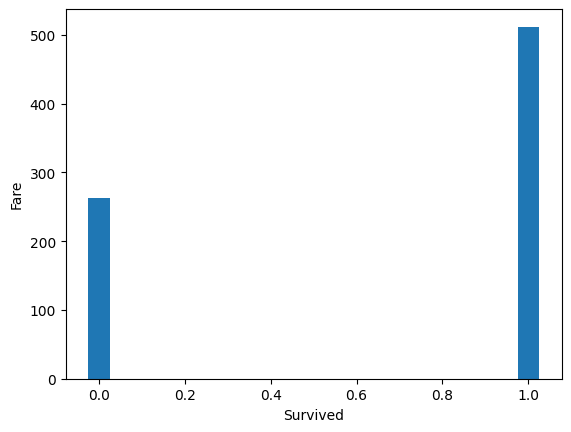

In [70]:
plt.bar(df['Survived'], df['Fare'], width=0.05)
plt.xlabel('Survived')
plt.ylabel('Fare')

### Survival percent by prefixes in names

In [40]:
def get_prefix(name: str) -> str:
    if 'Miss' in name:
        return 'Miss'
    elif 'Mrs' in name:
        return 'Mrs'
    elif 'Mr' in name:
        return 'Mr'
    elif 'Master' in name:
        return 'Master'
    else:
        return 'Other'

df['Prefix'] = df['Name'].apply(get_prefix)
survived_by_name = df.groupby('Prefix')['Survived'].mean()
survived_val = survived_by_name.sort_values(ascending=False)

print(f'Survival percent by prefixes:\n{survived_val}\n')

Survival percent by prefixes:
Prefix
Mrs       0.795276
Miss      0.697802
Master    0.575000
Other     0.375000
Mr        0.158301
Name: Survived, dtype: float64



<Axes: xlabel='Prefix'>

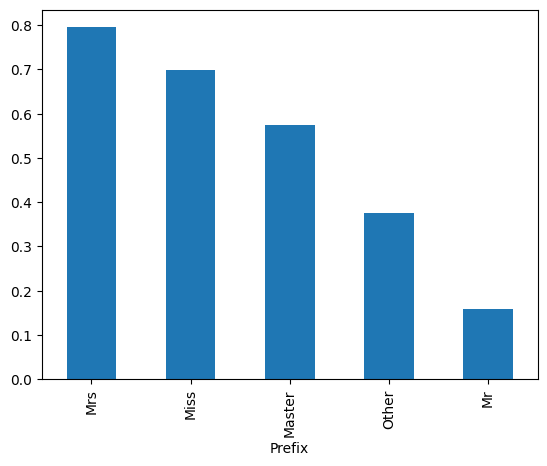

In [41]:
survived_val.plot.bar()

### Find families 

In [55]:
families = {}

for full_name in df['Name']:
    surname, _ = full_name.split(',', 1)
    if surname not in families:
        families[surname] = []
    families[surname].append(full_name)

families_df = pd.DataFrame.from_dict(families, orient = 'index')
families_df.head()

,0,1,2,3,4,5,6,7,8
Braund,"Braund, Mr. Owen Harris","Braund, Mr. Lewis Richard",None,None,None,None,None,None,None
Cumings,"Cumings, Mrs. John Bradley (Florence Briggs Th...",None,None,None,None,None,None,None,None
Heikkinen,"Heikkinen, Miss. Laina",None,None,None,None,None,None,None,None
Futrelle,"Futrelle, Mrs. Jacques Heath (Lily May Peel)","Futrelle, Mr. Jacques Heath",None,None,None,None,None,None,None
Allen,"Allen, Mr. William Henry","Allen, Miss. Elisabeth Walton",None,None,None,None,None,None,None


### Find couples

In [53]:
couples = {}

for surname, full_names in families.items():
    mrs = [name for name in full_names if 'Mrs.' in name and 
           df[df['Name'] == name]['Age'].values[0] > 18 and df[df['Name'] == name]['SibSp'].values[0] >= 1]
    mr = [name for name in full_names if 'Mr.' in name and 
          df[df['Name'] == name]['Age'].values[0] > 18 and df[df['Name'] == name]['SibSp'].values[0] >= 1]
    if mrs and mr:
        couples[surname] = {'Husbands': mr, 'Wives': mrs}

pd.DataFrame(couples).T.head()


,Husbands,Wives
Futrelle,"[Futrelle, Mr. Jacques Heath]","[Futrelle, Mrs. Jacques Heath (Lily May Peel)]"
Andersson,"[Andersson, Mr. Anders Johan]","[Andersson, Mrs. Anders Johan (Alfrida Konstan..."
Holverson,"[Holverson, Mr. Alexander Oskar]","[Holverson, Mrs. Alexander Oskar (Mary Aline T..."
Turpin,"[Turpin, Mr. William John Robert]","[Turpin, Mrs. William John Robert (Dorothy Ann..."
Laroche,"[Laroche, Mr. Joseph Philippe Lemercier]","[Laroche, Mrs. Joseph (Juliette Marie Louise L..."


### Find children

In [52]:
children = {}

for surname, full_names in families.items():
    child = [name for name in full_names if 'Master' in name or 'Miss' in name and df[df['Name'] == name]['Age'].values[0] < 18 and 
             df[df['Name'] == name]['Parch'].values[0] >= 1]
    if child:
        children[surname] = child

children_df = pd.DataFrame.from_dict(children, orient='index')
children_df.head()

,0,1,2,3,4,5
Palsson,"Palsson, Master. Gosta Leonard","Palsson, Miss. Torborg Danira","Palsson, Miss. Stina Viola",None,None,None
Johnson,"Johnson, Miss. Eleanor Ileen","Johnson, Master. Harold Theodor",None,None,None,None
Sandstrom,"Sandstrom, Miss. Marguerite Rut",None,None,None,None,None
Andersson,"Andersson, Miss. Erna Alexandra","Andersson, Miss. Ellis Anna Maria","Andersson, Miss. Ingeborg Constanzia","Andersson, Miss. Sigrid Elisabeth","Andersson, Miss. Ebba Iris Alfrida","Andersson, Master. Sigvard Harald Elias"
Rice,"Rice, Master. Eugene","Rice, Master. Arthur","Rice, Master. Eric","Rice, Master. George Hugh",None,None


### Find siblings

In [51]:
siblings = {}

for surname, full_names in families.items():
    sib = [name for name in full_names if 'Master' in name or 'Miss' in name and df[df['Name'] == name]['SibSp'].values[0] > 0]
    if len(sib) > 1:
        siblings[surname] = sib

siblings_df = pd.DataFrame.from_dict(siblings, orient='index')
siblings_df.head()

,0,1,2,3,4,5
Palsson,"Palsson, Master. Gosta Leonard","Palsson, Miss. Torborg Danira","Palsson, Miss. Stina Viola",None,None,None
Johnson,"Johnson, Miss. Eleanor Ileen","Johnson, Master. Harold Theodor",None,None,None,None
Andersson,"Andersson, Miss. Erna Alexandra","Andersson, Miss. Ellis Anna Maria","Andersson, Miss. Ingeborg Constanzia","Andersson, Miss. Sigrid Elisabeth","Andersson, Miss. Ebba Iris Alfrida","Andersson, Master. Sigvard Harald Elias"
Rice,"Rice, Master. Eugene","Rice, Master. Arthur","Rice, Master. Eric","Rice, Master. George Hugh",None,None
Asplund,"Asplund, Master. Clarence Gustaf Hugo","Asplund, Miss. Lillian Gertrud","Asplund, Master. Edvin Rojj Felix",None,None,None


### ВЫВОДЫ
#### Стобец выживаемости положительно коррелирует со столбцами Pclass и Fare. У 1 класса выживаемость больше, чем у остальных классов. Средняя стоимость билета у выживших больше, чем у погибших.
#### Большая выживаемость у женщин с префиксом Mrs, далее у Miss. Меньшая виживаемость у мужчин Mr